<div style="background-color: lightgreen; padding: 18px;">
    <h1> Projeto| Estatística I
</div>

### Esse projeto visa a aplicação dos conceitos e ferramental da Estatística desenvolvidos nesse módulo

##### Para o desenvolvimento das atividades abaixo, o seu grupo pode escolher qualquer dataset que contenha uma coluna com valores inteiros.

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
dataset = pd.read_csv(r"df_arabica_clean.csv", delimiter=",")

(dataset.head(10))

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,NaN,Taiwan Coffee Laboratory,1668,Chimaltenango,...,87.00,10.7,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.92,9.1,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
7,7,7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,"The 2022 Pacific Rim Coffee Summit,T050",七彩琉璃咖啡莊園,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,86.75,10.0,0,0,yellow green,1,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
8,8,8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,"The 2022 Pacific Rim Coffee Summit,T018",亮軒咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
9,9,9,"Tanzania, United Republic Of",MASHIMA AMCOS,CN 4127230034/4189230113,GOURMET COFFEE MILL,033/DE/503/002 and 033/DE/268/002,DORMAN (T) LIMITED,1400-1700,KILIMANJARO,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",Kenya Coffee Traders Association,"P.O. Box 646 00100Nairobi, Kenya, Denniss Prit...",Benson Kibicho Kamau - +254 786 821 621


In [98]:
(dataset.describe())

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


__1) Em algum dataset, classifique as suas colunas em Quantitativa Discreta, Quantitiva Contínua, Qualitativa Ordinal ou Qualitativa Nominal.__


In [99]:
(dataset.columns)

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [30]:
dataset['Expiration'].head(20)

0     September 21st, 2023
1      November 15th, 2023
2      November 15th, 2023
3     September 21st, 2023
4          March 5th, 2024
5      November 15th, 2023
6      November 15th, 2023
7      November 15th, 2023
8      November 15th, 2023
9       February 1st, 2024
10          May 31st, 2023
11     November 15th, 2023
12     November 15th, 2023
13       August 26th, 2023
14     November 15th, 2023
15     November 15th, 2023
16         April 6th, 2024
17      October 24th, 2023
18      October 24th, 2023
19      February 1st, 2024
Name: Expiration, dtype: object

## Colunas Principais: Classificação

| Coluna | Classificação |
|:------:|:-------------:|
| Country of Origin | Qualitativa Nominal |
| Farm Name | Qualitativa Nominal |
| Lot Number | Qualitativa Ordinal |
| Company | Qualitativa Nominal |
| Altitude | *Quantitativa Contínua* |
| Region | Qualitativa Nominal |
| Producer | Qualitativa Nominal |
| Number of Bags | *Quantitativa Discreta* |
| Bag Weight | *Quantitativa Contínua* |
| Harvest Year | *Quantitativa Discreta* |
| Variety | Qualitativa Nominal |
| Processing Method | Qualitativa Nominal |
| Aroma | *Quantitativa Discreta* |
| Flavor | *Quantitativa Discreta* |
| Aftertaste | *Quantitativa Discreta* |
| Acidity | *Quantitativa Discreta* |
| Body | *Quantitativa Discreta* |
| Balance | *Quantitativa Discreta* |
| Uniformity | *Quantitativa Discreta* |
| Clean Cup | *Quantitativa Discreta* |
| Sweetness | *Quantitativa Discreta* |
| Overall | *Quantitativa Discreta* |
| Defects | *Quantitativa Contínua* |
| Total Cup Points | *Quantitativa Discreta* |
| Moisture Percentage | *Quantitativa Discreta* |
| Category One Defects | *Quantitativa Contínua* |
| Quakers | *Quantitativa Contínua* |
| Color | Qualitativa Nominal |
| Category Two Defects | *Quantitativa Contínua* |
| Expiration | Qualitativa Ordinal |

- **2.1) Com o mesmo dataset, construir a distribuição de probabilidade de uma feature com valores inteiros.**
- **2.2) Escrever uma função para calcular a Esperança e outra função para calcular a Variância dessa variável aleatória.** 
- **2.3) Compare o resultado de sua função com os resultados de alguma nativa do Python (há muitos módulos/bibliotecas que calculam esses parâmetros).**
- **2.4) Construa uma função que faça o papel da cdf() e outra função com o papel da sf().**
- **Desafio extra:** _construir funções que fazem o papel da ppf() e da isf()._

In [103]:
dataset['Total Cup Points'].unique()


array([89.33, 87.58, 87.42, 87.17, 87.08, 87.  , 86.92, 86.75, 86.67,
       86.5 , 86.25, 86.17, 86.08, 85.92, 85.83, 85.75, 85.67, 85.58,
       85.5 , 85.42, 85.33, 85.25, 85.17, 85.08, 85.  , 84.92, 84.83,
       84.75, 84.67, 84.58, 84.5 , 84.42, 84.33, 84.25, 84.17, 84.08,
       84.  , 83.92, 83.83, 83.75, 83.67, 83.58, 83.5 , 83.42, 83.33,
       83.25, 83.17, 83.08, 83.  , 82.92, 82.83, 82.75, 82.67, 82.58,
       82.5 , 82.42, 82.33, 82.25, 82.17, 82.08, 82.  , 81.92, 81.83,
       81.75, 81.67, 81.58, 81.5 , 81.42, 81.33, 81.17, 81.  , 80.83,
       80.5 , 80.42, 80.33, 80.17, 80.08, 80.  , 79.67, 78.08, 78.  ])

In [104]:
dataset['Total Cup Points'].describe()

count    207.000000
mean      83.706570
std        1.730417
min       78.000000
25%       82.580000
50%       83.750000
75%       84.830000
max       89.330000
Name: Total Cup Points, dtype: float64

In [105]:
# Escolhendo a feature
dataset['Total Cup Points'] = dataset['Total Cup Points'].round()

value_counts = dataset["Total Cup Points"].value_counts()
probabilities = value_counts / value_counts.sum()

print(probabilities)

Total Cup Points
84.0    0.236715
85.0    0.188406
83.0    0.188406
82.0    0.164251
86.0    0.096618
80.0    0.043478
87.0    0.033816
81.0    0.028986
78.0    0.009662
89.0    0.004831
88.0    0.004831
Name: count, dtype: float64


In [106]:
value_counts

Total Cup Points
84.0    49
85.0    39
83.0    39
82.0    34
86.0    20
80.0     9
87.0     7
81.0     6
78.0     2
89.0     1
88.0     1
Name: count, dtype: int64

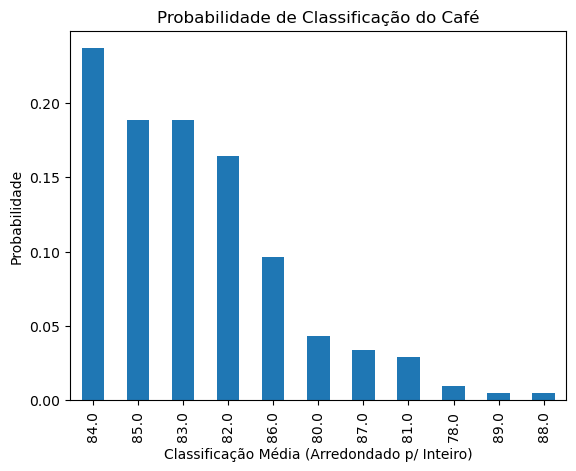

In [108]:
probabilities.plot(kind='bar')

plt.xlabel('Classificação Média (Arredondado p/ Inteiro)')
plt.ylabel('Probabilidade')
plt.title('Probabilidade de Classificação do Café')

plt.show()

In [109]:
# Calcular Esperança da Variável
# soma do produto de cada probabilidade de saida, pelo respectivo valor
from numpy.typing import ArrayLike

def esperanca(prob_arr: ArrayLike, value_arr: ArrayLike, exp: int = 1):
    return sum([prob * value ** exp for prob, value in zip(prob_arr, value_arr)])

In [110]:
# Calcular Variancia da Variavel, utilizando a esperança
from numpy.typing import ArrayLike

def variancia(prob_arr: ArrayLike, value_arr: ArrayLike):
    return esperanca(prob_arr, value_arr, exp=2) - (esperanca(prob_arr, value_arr)) ** 2

In [111]:
count = 207


values = [84, 85, 83, 82, 86, 80, 87, 81, 78, 89, 88]
counts = [49, 39, 39, 34, 20, 9, 7, 6, 2, 1, 1]
probabilites = [x/count for x in counts]

np_prob = np.array(probabilities)
np_values = np.array(values)

print(f"Esperança: {esperanca(prob_arr=np_prob, value_arr=np_values)}")
print(f"Variancia: {variancia(prob_arr=np_prob, value_arr=np_values):.2f}")

Esperança: 83.69082125603865
Variancia: 3.13


In [112]:
np_ratings = np.array(dataset['Total Cup Points'])

print(f"Esperança: {np.mean(np_ratings)}")
print(f"Variancia: {np.var(np_ratings):.2f}")

Esperança: 83.69082125603865
Variancia: 3.13


In [113]:
stats.norm.cdf(1)

0.8413447460685429

 __3) Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__


__4) No exercício anterior, construir o intervalo de confiança para a média, com nível de confiança de 95% e erro percentual de 2% (para cima ou para baixo).__

__5) Se uma amostra de tamanho 30, vinda da variável aleatória do exercício 2), tiver uma média 10% maior que a média da população, a hipótese de que essas médias são iguais seria rejeitada ou não rejeitada, com um nível de confiança de 95%? (faça o teste de hipótese para responder essa pergunta).__
